# Final Project: Gentrification in Westlake and Surrounding Communities

## Cluster Analysis 

We conduct 3 cluster analyses. First, we create 5 clusters using our numeric data (namely the percent change indicators from the census data). Our second cluster analysis includes 10 clusters (using solely the numeric data). Our last cluster analysis has 5 clusters and includes dummy variables for our 6 neighborhoods of interest. We analyze and map our results.

### Cluster 1

In [11]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.cluster import KMeans
import seaborn as sns

In [7]:
cluster1 = pd.read_csv('Cluster1.csv')
cluster1 = cluster1.drop(columns={'Unnamed: 0'})

In [8]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(cluster1)

In [9]:
cluster1['cluster_id'] = kmeans.labels_

In [10]:
cluster1.groupby('cluster_id').size()

cluster_id
0    28
1    26
2     2
3    10
4    62
dtype: int64

In [12]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

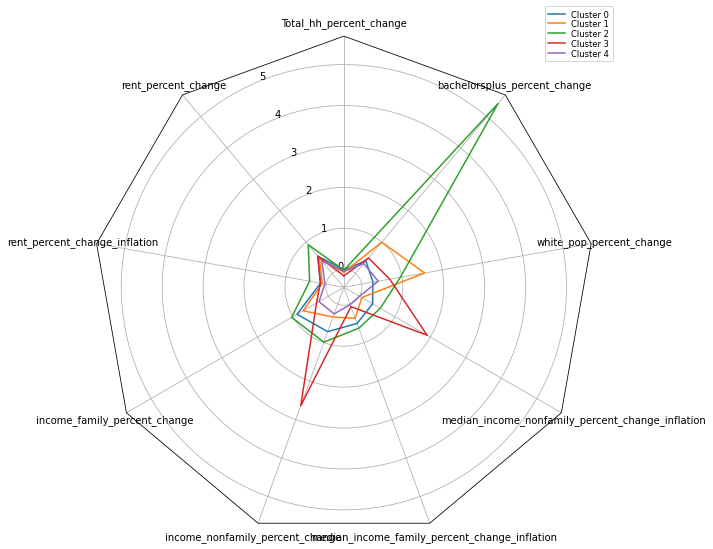

In [14]:
def radar_plot(kmeans, cluster1):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in cluster1.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')
radar_plot (kmeans, cluster1)

Cluster 0, which includes 28 census tracts, has relatively even percent change across the indicators with a slightly larger change in rents. Cluster 1 includes 26 census tracts, which have the second highest change in the percent of people with bachelor's degrees and white population. Cluster 2 includes only 2 census tracts which are characterized by an extremely large change in the percent of people with bachelor's degrees and the percent of white people. Cluster 3 includes 10 census tracts and has large percent change in median nonfamily income with and without inflation and rents. Cluster 4 is the largest cluster with 62 census tracts. It includes census tracts that have shown the least amount of change in the indicators over time. 

Overall, it appears clusters 0 and 4, which make up the majority of the census tracts (90 census tracts in total), are the most stable over the 10 year period, meaning they are likely stable or already underwent full gentrification before 2010. The other 3 clusters represent varying degrees of neighborhood change with cluster 2 exhibiting the most dramatic change in demographics and rent, cluster 1 exhibiting some change in demographics, and cluster 3 exhibiting dramatic change in nonfamily income. 

### Cluster 2

In [16]:
cluster2 = pd.read_csv('Cluster1.csv')
cluster2 = cluster2.drop(columns={'Unnamed: 0'})

In [17]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(cluster2)

In [18]:
cluster2['cluster_id'] = kmeans.labels_

In [19]:
cluster2.groupby('cluster_id').size()

cluster_id
0    23
1     6
2    17
3     2
4     8
5    16
6     4
7    10
8    34
9     8
dtype: int64

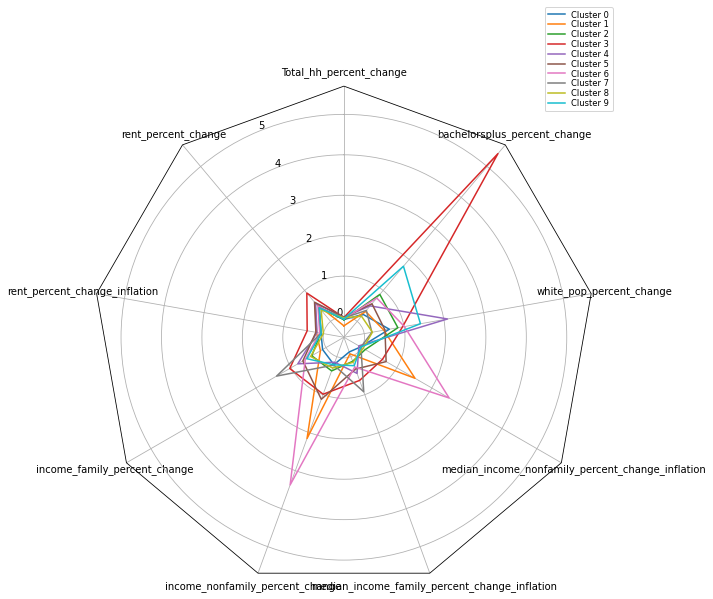

In [20]:
def radar_plot(kmeans, cluster2):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in cluster2.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')
radar_plot (kmeans, cluster2)

This 10 cluster radar plot builds off of the previous 5 cluster plot. We still have a cluster (in this case cluster 3) that has an extremely high percent change in people with bachelor's degrees. Cluster 6 has a high percent change in nonfamily income with and without inflation. Cluster 4 has the highest percent change in white population. In general, this plot is much harder to read because there is so much going on. For this reason, we work with 5 clusters moving forward. 

### Cluster 3

In [28]:
cluster3 = pd.read_csv('Cluster3.csv')
cluster3 = cluster3.drop(columns={'Unnamed: 0'})

In [30]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(cluster3)

In [31]:
cluster3['cluster_id'] = kmeans.labels_

In [32]:
cluster3.groupby('cluster_id').size()

cluster_id
0    10
1     2
2    56
3    26
4    34
dtype: int64

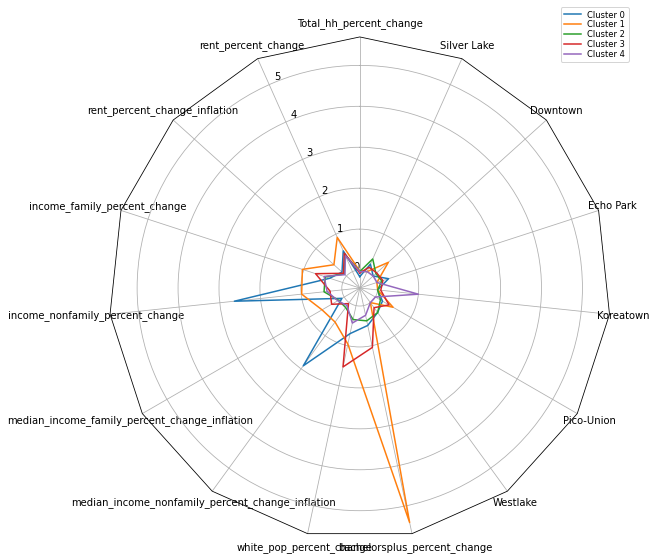

In [34]:
def radar_plot(kmeans, cluster3):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in cluster3.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')
radar_plot (kmeans, cluster3)

Interstingly, the radar plot changes a bit and the clusters become slighlty more evenly sized when we incorporate the neighborhood dummy variables. Cluster 0, which includes 10 census tracts, has a high percent change in nonfamily income with and without inflation. Cluster 1, which has only 2 census tracts, has an extremely high percent change in bachelor's degrees and a notably high percent change in family and nonfamily income and rent. Both census tracts are located in Downtown. Cluster 2 has 56 census tracts and appears pretty stable with more census tracts in Silver Lake. Cluster 3 has 26 census tracts and has a somewhat high percent change in white population. Cluster 4 has 34 census tracts and also appears stable with more census tracts in Koreatown. Like with the previous radar plot, 2 clusters (in this case clusters 2 and 4) appear stable and 3 clusters (clusters 0, 1, and 3) show greater signs of neighborhood change.  

## Visualizing Clusters and Comparing to Urban Displacement Project Data